# **BPI Bank Client Term Deposit Subscription Classification Project**

### **Importing Libraries**

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Data Loading**

In [187]:
data = pd.read_csv('portu_banking_final.csv')

### **Data Cleaning**

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

**Cleaning Age Column**

In [189]:
data['age'].value_counts()

31       1530
32       1456
33       1452
35       1431
36       1408
         ... 
94          1
17          1
87          1
95          1
20-40       1
Name: age, Length: 159, dtype: int64

In [190]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [191]:
data.replace(to_replace={'age': {'20-40': '30', '35-40': '38', '20-25':'22', '30-35':'32', '25-30':'28', '50-55':'52', '45-50': '48', '18-25':'20', '30-32':'31', '35-30':'32', '30-40':'35'}}, inplace=True)
data['age'].value_counts()

31    1531
32    1460
33    1452
35    1432
36    1408
      ... 
82       2
95       1
87       1
17       1
94       1
Name: age, Length: 148, dtype: int64

In [192]:
data['age'] = data['age'].astype(int)

**Cleaning Job Column**

In [193]:
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [194]:
rp = {'ADMIN.': 'admin.', 'BLUE-COLLAR':'blue-collar', 'TECHNICIAN': 'technician', 'RETIRED':'retired', 'SERVICES':'services', 'MANAGEMENT':'management','HOUSEMAID':'housemaid', 'STUDENT': 'student', 'UNKNOWN': 'admin.', 'unknown':'admin.'}


In [195]:
data.replace(to_replace={'job': rp}, inplace=True)
data['job'].value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

**Cleaning day of week column**

In [196]:
data['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

**Cleaning Marital Status column**

In [197]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [198]:
data.replace(to_replace={'marital': {'D': 'divorced', 'M': 'married', 'S': 'single', 'unknown': 'married'}}, inplace=True)
data['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

**Cleaning Education column**

In [199]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [200]:
data.replace(to_replace={'education': {'basic-6y': 'basic.6y', 'basic-9y': 'basic.9y', 'basic-4y':'basic.4y', 'illiterate': 'university.degree', 'unknown': 'university.degree'}}, inplace=True)

In [201]:
data['education'].value_counts()

university.degree      13917
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
Name: education, dtype: int64

**Cleaning Default column**

In [202]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [203]:
data.replace(to_replace= {'default': {'unknown': 'yes'}}, inplace= True)

In [204]:
data['default'].value_counts()

no     32588
yes     8600
Name: default, dtype: int64

**Cleaning housing column**

In [205]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

**Cleaning loan column**

In [206]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

**Cleaning contact column**

In [207]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

**Cleaning month column**

In [208]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

**Cleaning poutcome column**

In [209]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [211]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


**Checking on the dependant variable column for balance**

In [212]:
#Note: y is the dependent variable. It shows the classification of clients who subscribe to BPI term deposit or not. 0 means the client does not subcribe.
# Results show that the dataset is unbalanced
y= data['y']
unique, counts = np.unique(y, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    0, 36548],
       [    1,  4640]])

### **Exploring data with Group by**

In [213]:
data.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.898959,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.300304,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,33.157849,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [214]:
data.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.447644,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061869,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.997898,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
professional.course,40.079725,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,39.462815,254.394050,2.567220,951.974204,0.196522,-0.017382,93.513780,-39.963584,3.534800,5162.780039,0.138320


In [215]:
data.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.413225,253.862909,2.624256,955.514788,0.187965,0.026070,93.539728,-40.201004,3.562512,5164.395638,0.129185
blue-collar,39.555003,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360123,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947924,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


### **Exploratory Data Analysis**

**Job**

Text(0, 0.5, 'Proportion of Customers')

<Figure size 1152x1152 with 0 Axes>

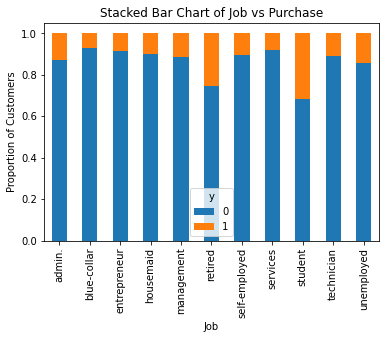

In [216]:
plt.figure(figsize=(16,16))
job=pd.crosstab(data.job,data.y)
job.div(job.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')


**Martial Status**

Text(0, 0.5, 'Proportion of Customers')

<Figure size 1152x1152 with 0 Axes>

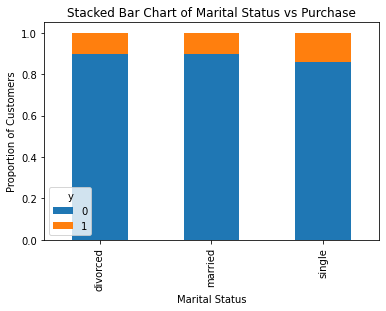

In [217]:
table=pd.crosstab(data.marital,data.y)
plt.figure(figsize=(16,16))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


**Age**

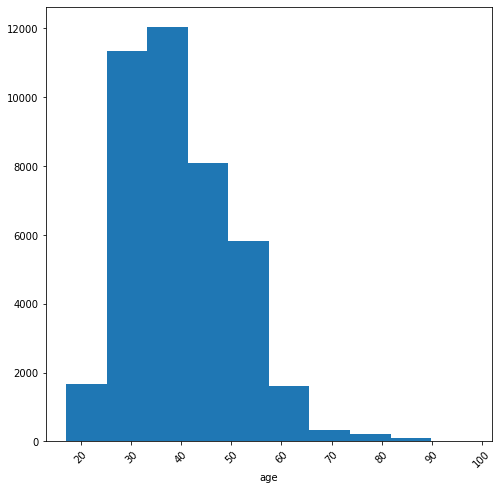

In [218]:
plt.figure(figsize=(8,8))
plt.xticks(rotation='45')
plt.hist(data['age'])
plt.xlabel('age')
plt.show()

### **Categorical Variable Encoding**

In [219]:
dcat = data.select_dtypes(include=['object'])
dcat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,yes,yes,no,cellular,aug,thu,nonexistent
1,technician,married,university.degree,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,yes,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic.4y,yes,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,yes,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [220]:
dcat['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'student'], dtype=object)

In [221]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dcat['job'] = encode.fit_transform(dcat['job'])
dcat['marital'] = encode.fit_transform(dcat['marital'])
dcat['contact'] = encode.fit_transform(dcat['contact'])
dcat['day_of_week'] =encode.fit_transform(dcat['day_of_week'])
dcat['education'] = encode.fit_transform(dcat['education'])
dcat['housing'] = encode.fit_transform(dcat['housing'])
dcat['loan'] = encode.fit_transform(dcat['loan'])
dcat['month'] = encode.fit_transform(dcat['month'])
dcat['poutcome'] = encode.fit_transform(dcat['poutcome'])
dcat['default'] = encode.fit_transform(data['default'])

In [222]:
dcat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,0,1,2,0,0,1,2,1
1,9,1,5,0,0,0,0,7,0,1
2,4,2,5,0,2,0,0,4,2,2
3,7,1,3,0,0,0,0,0,0,1
4,5,1,0,0,2,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...
41183,5,1,3,1,0,2,1,4,2,1
41184,3,1,0,1,0,0,1,6,2,1
41185,0,2,5,1,2,2,1,6,4,1
41186,9,1,4,0,0,2,1,8,3,1


In [223]:
df = data.select_dtypes(include=['float64', 'int64'])
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [224]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [225]:
df.shape

(41188, 11)

In [226]:
dcat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [227]:
dcat.shape

(41188, 10)

In [228]:
data_new = df

In [229]:
data_new[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']] = dcat[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']]

In [230]:
data_new

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,1,1,0,1,2,0,0,1,2,1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,9,1,5,0,0,0,0,7,0,1
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,4,2,5,0,2,0,0,4,2,2
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,7,1,3,0,0,0,0,0,0,1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,5,1,0,0,2,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,5,1,3,1,0,2,1,4,2,1
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,3,1,0,1,0,0,1,6,2,1
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,2,5,1,2,2,1,6,4,1
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,9,1,4,0,0,2,1,8,3,1


### **Preliminary Training**

## **Spliting data into training set and test set**

In [231]:
y= data_new['y']
x= data_new.drop(columns=['y'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [232]:
model = LogisticRegression(verbose=1, max_iter = 1000)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished


LogisticRegression(max_iter=1000, verbose=1)

In [233]:
predictions = model.predict(x_test)
print(predictions)

[0 0 0 ... 0 1 0]


In [234]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7275
           1       0.65      0.40      0.50       963

    accuracy                           0.90      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.89      0.90      0.89      8238



In [235]:
confusion_matrix(y_test,predictions)

array([[7069,  206],
       [ 578,  385]])

### **Improving model performance**

## **SMOTE**

In [236]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [237]:
x_train_smote, y_train_smote = smote.fit_resample (x_train.astype('float'), y_train)

In [238]:
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 29273, 1: 3677})
After SMOTE:  Counter({0: 29273, 1: 29273})


In [239]:
model = LogisticRegression(verbose=1, max_iter = 1000)
model.fit(x_train_smote, y_train_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s finished


LogisticRegression(max_iter=1000, verbose=1)

In [240]:
predictions = model.predict(x_test)
print(predictions)

[0 0 0 ... 0 1 0]


In [241]:
print(accuracy_score(y_test, predictions))

0.8526341344986648


In [242]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7275
           1       0.43      0.86      0.58       963

    accuracy                           0.85      8238
   macro avg       0.71      0.86      0.74      8238
weighted avg       0.92      0.85      0.87      8238



In [243]:
confusion_matrix(y_test,predictions)

array([[6195, 1080],
       [ 134,  829]])

### **RFE**

In [244]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(x_train, y_train)
X_train_sub = rfe.transform(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [245]:
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True])

In [246]:
rfe.ranking_

array([ 5,  8,  1, 10,  1,  1,  1,  1,  6,  4, 11,  3,  2,  1,  9,  7,  1,
        1,  1,  1])

In [247]:
x.columns[0:][rfe.support_]

Index(['campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'default', 'contact', 'month', 'day_of_week',
       'poutcome'],
      dtype='object')

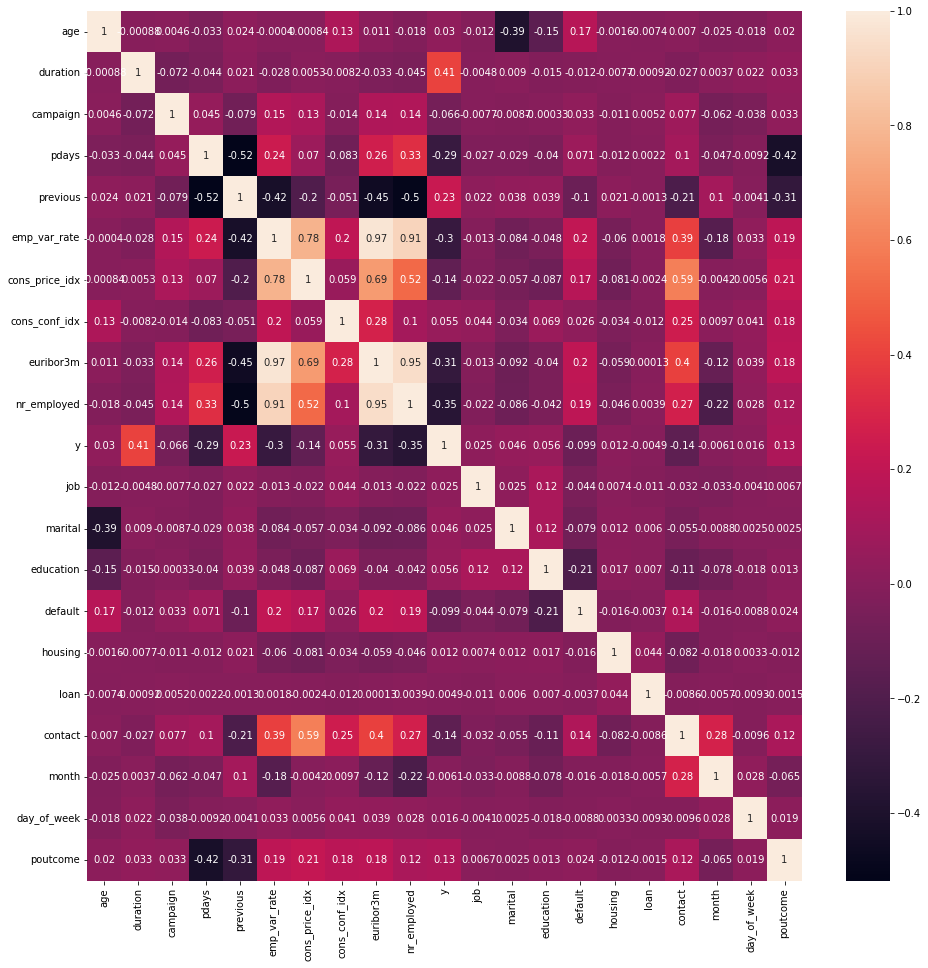

In [248]:
plt.figure(figsize=(16,16))
sns.heatmap(data_new.corr(), annot=True)


In [249]:
x_rfe = x[['previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'marital', 'default', 'contact', 'month', 'poutcome']]
x_rfe

,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,marital,default,contact,month,poutcome
0,0,1.4,93.444,-36.1,4.963,1,1,0,1,1
1,0,-0.1,93.200,-42.0,4.021,1,0,0,7,1
2,2,-1.7,94.055,-39.8,0.729,2,0,0,4,2
3,0,-1.8,93.075,-47.1,1.405,1,0,0,0,1
4,1,-2.9,92.201,-31.4,0.869,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
41183,0,1.4,94.465,-41.8,4.866,1,1,1,4,1
41184,0,1.1,93.994,-36.4,4.860,1,1,1,6,1
41185,0,1.1,93.994,-36.4,4.857,2,1,1,6,1
41186,0,-3.4,92.431,-26.9,0.742,1,0,1,8,1


In [250]:
x_train, x_test, y_train, y_test = train_test_split(x_rfe, y, test_size = 0.2)

In [251]:
model = LogisticRegression(verbose=1, max_iter = 1000)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=1000, verbose=1)

In [252]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print( classification_report(y_test, predictions) )
confusion_matrix(y_test,predictions)

0.8997329448895363
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7325
           1       0.65      0.20      0.31       913

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.88      8238



array([[7227,   98],
       [ 728,  185]])

### **Doing SMOTE after RFE**

In [253]:
x_train_smote, y_train_smote = smote.fit_resample (x_train.astype('float'), y_train)

In [254]:
model = LogisticRegression(verbose=1, max_iter = 1000)
model.fit(x_train_smote, y_train_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=1000, verbose=1)

In [255]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print( classification_report(y_test, predictions) )
confusion_matrix(y_test,predictions)

0.7671764991502792
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7325
           1       0.28      0.68      0.39       913

    accuracy                           0.77      8238
   macro avg       0.61      0.73      0.62      8238
weighted avg       0.88      0.77      0.80      8238



array([[5702, 1623],
       [ 295,  618]])

# **RFFCV (Choosing the number of features automatically)**

In [256]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=model,
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    cv=5,
)

_ = rfecv.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


In [257]:
x_train.columns[rfecv.support_]


Index(['previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'marital', 'default', 'contact', 'month', 'poutcome'],
      dtype='object')

In [261]:
x_rfecv = x[['previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'marital', 'default', 'contact', 'month', 'poutcome']]

In [259]:
x_rfecv.shape

(32950, 10)

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x_rfecv, y, test_size = 0.2)

In [263]:
model = LogisticRegression(verbose=1, max_iter = 1000)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=1000, verbose=1)

In [264]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print( classification_report(y_test, predictions) )
confusion_matrix(y_test,predictions)

0.9000971109492595
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7312
           1       0.74      0.17      0.28       926

    accuracy                           0.90      8238
   macro avg       0.82      0.58      0.61      8238
weighted avg       0.89      0.90      0.87      8238



array([[7256,   56],
       [ 767,  159]])

### **Doing SMOTE after RFECV**

In [265]:
x_train_smote, y_train_smote = smote.fit_resample (x_train.astype('float'), y_train)
model = LogisticRegression(verbose=1, max_iter = 1000)
model.fit(x_train_smote, y_train_smote)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print( classification_report(y_test, predictions) )
confusion_matrix(y_test,predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7481184753580966
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      7312
           1       0.26      0.67      0.37       926

    accuracy                           0.75      8238
   macro avg       0.60      0.71      0.61      8238
weighted avg       0.87      0.75      0.79      8238



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


array([[5544, 1768],
       [ 307,  619]])